In [20]:
import pytz
import os
import sqlite3
import re
import uproot
import IPython
import sys
import numpy as np
import pandas as pd
import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandasql import sqldf
from rnog_data.runtable import RunTable
from datetime import datetime, timedelta
from scipy.fft import fft
from scipy.signal import stft
from NuRadioReco.modules.io.RNO_G.readRNOGDataMattak import readRNOGData
from NuRadioReco.utilities import units

def simple_l1(frequencies):
    return np.max(frequencies**2)/np.median(frequencies**2)

def simple_inverse_l1(frequencies):
    return np.median(frequencies**2)/np.max(frequencies**2)
    
def test_simple_l1(frequencies):
    return np.max(frequencies**2)/np.sum(frequencies**2)

In [9]:
reader = readRNOGData()

In [10]:
reader.begin(['/home/oliver/software/Flights/combined/station21_run2730_combined.root'], overwrite_sampling_rate=3200*units.MHz)


INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
/home/oliver/anaconda3/envs/work/lib/python3.11/site-packages/mattak/Dataset.py:212: UserWarning: data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.
  warnings.warn("data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.")
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:555 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Found combined file


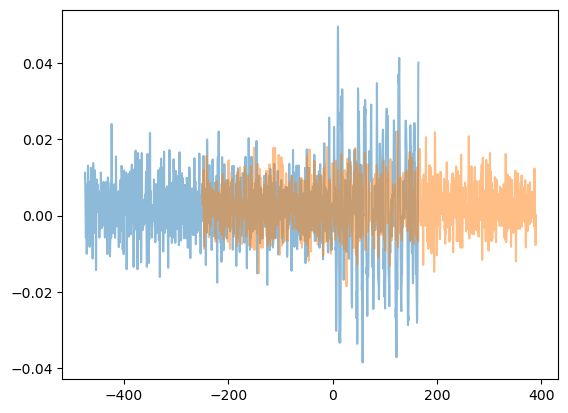

In [16]:
evt = reader.get_event(run_nr=2730, event_id=839)
evt2 = reader.get_event_by_index(21)
station = evt.get_station(21)
station2 = evt2.get_station(21)
#print(station.get_station_time())
channel = station.get_channel(14)
channel2 = station2.get_channel(14)
trace = channel.get_trace()
trace2 = channel2.get_trace()
times = channel.get_times()
times2 = channel2.get_times()

#print(channel.get_sampling_rate()/units.GHz)

plt.plot(times, trace, '-', alpha = 0.5)
plt.plot(times2, trace2, '-', alpha = 0.5)
plt.show()

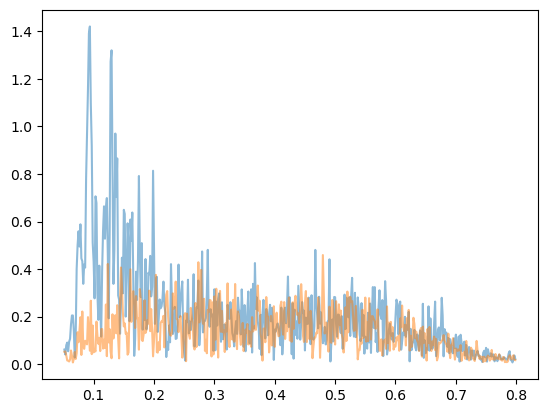

In [17]:
spectrum = np.abs(channel.get_frequency_spectrum())
spectrum2 = np.abs(channel2.get_frequency_spectrum())
freq = channel.get_frequencies()
freq2 = channel2.get_frequencies()

mask = (freq != 0.2) & (freq > 0.05) & (freq < 0.8)
mask2 = (freq2 != 0.2) & (freq2 > 0.05) & (freq < 0.8)

spectrum = spectrum[mask]
spectrum2 = spectrum2[mask2]

freq = freq[mask]
freq2 = freq2[mask2]



plt.plot(freq, spectrum, alpha = 0.5)
plt.plot(freq2, spectrum2, alpha = 0.5)
#plt.xlim(0, 0.8)

In [21]:
l1 = simple_l1((spectrum))
l2 = simple_inverse_l1(np.abs(spectrum))
l3 = test_simple_l1(spectrum)

print(f'l1: {l1}, max(spectrum**2): {np.max(np.abs(spectrum**2)):.2f}, med(spectrum**2): {np.median(np.abs(spectrum**2)):.4f}')
print(f'l2: {l2}')
print(f'l3: {l3}')
print(np.average(np.abs(spectrum**2)))
print(np.median(np.abs(spectrum**2)))

l1: 76.26237989592782, max(spectrum**2): 2.02, med(spectrum**2): 0.0265
l2: 0.013112625141841357
l3: 0.04868091458785162
0.08676662516548296
0.026474573786198635


In [22]:
l1 = simple_l1(np.abs(spectrum2))
l2 = simple_inverse_l1(np.abs(spectrum2))
l3 = test_simple_l1(spectrum2)
print(f'l1: {l1}, max(spectrum**2): {np.max(np.abs(spectrum2**2)):.2f}, med(spectrum**2): {np.median(np.abs(spectrum2**2)):.4f}')
print(f'l2: {l2}')
print(f'l3: {l3}')
print(np.average(np.abs(spectrum2**2)))
print(np.median(np.abs(spectrum2**2)))

l1: 14.774714882945108, max(spectrum**2): 0.21, med(spectrum**2): 0.0143
l2: 0.06768320119356955
l3: 0.01695254804821073
0.025985127394967132
0.014251764001120971
